# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:10<00:00, 5.78KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

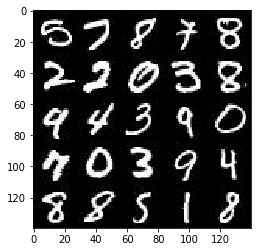

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

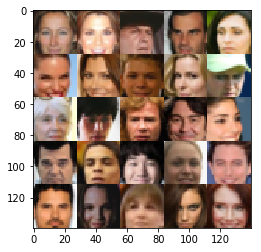

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, 
                                             image_channels), name='real_input')
    z_input = tf.placeholder(tf.float32, (None, z_dim), name='z_input')
    learn_rate = tf.placeholder(tf.float32, None, name='learn_rate')
    return real_input, z_input, learn_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.1
    
    with tf.variable_scope('discriminator', reuse=reuse):
  # Input layer 
        x1 = tf.layers.conv2d(images, 64, 5, strides=2,padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
      
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2,padding='same')
        bol_2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bol_2, bol_2)
    
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2,padding='same')
        bol_3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bol_3, bol_3)
     
        ft = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(ft, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.1
    
    with tf.variable_scope('generator', reuse=(not is_train)):
      
        x1 = tf.layers.dense(z, 7*7*256)
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
 
    
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2,padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
    
    
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)

   
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [11]:
def model_loss(input_real, input_z, out_channel_dim):
    import numpy as np
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    g_model = generator(input_z, out_channel_dim,is_train=True)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)* np.random.uniform(0.7, 1.2)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake


    
    return d_loss,g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [12]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt
   


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [14]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every=10
    show_every=100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epochs):
            for x in get_batches(batch_size):
                steps += 1

                x = x * 2
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: x, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: x})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: x})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                    if steps % show_every == 0:
                        show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.7803... Generator Loss: 20.0481
Epoch 1/2... Discriminator Loss: 0.5191... Generator Loss: 5.1483
Epoch 1/2... Discriminator Loss: 2.1103... Generator Loss: 0.3184
Epoch 1/2... Discriminator Loss: 2.7023... Generator Loss: 0.1317
Epoch 1/2... Discriminator Loss: 1.8412... Generator Loss: 0.3167
Epoch 1/2... Discriminator Loss: 1.8049... Generator Loss: 0.3015
Epoch 1/2... Discriminator Loss: 1.7030... Generator Loss: 0.3609
Epoch 1/2... Discriminator Loss: 1.8264... Generator Loss: 0.2996
Epoch 1/2... Discriminator Loss: 1.5222... Generator Loss: 0.4256
Epoch 1/2... Discriminator Loss: 1.4362... Generator Loss: 0.4623


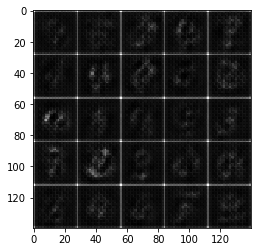

Epoch 1/2... Discriminator Loss: 1.5820... Generator Loss: 0.3781
Epoch 1/2... Discriminator Loss: 1.4833... Generator Loss: 0.4453
Epoch 1/2... Discriminator Loss: 1.4272... Generator Loss: 0.4631
Epoch 1/2... Discriminator Loss: 1.4909... Generator Loss: 0.4301
Epoch 1/2... Discriminator Loss: 1.5624... Generator Loss: 0.3848
Epoch 1/2... Discriminator Loss: 1.4858... Generator Loss: 0.4450
Epoch 1/2... Discriminator Loss: 1.6763... Generator Loss: 0.3322
Epoch 1/2... Discriminator Loss: 1.6011... Generator Loss: 0.4067
Epoch 1/2... Discriminator Loss: 1.5035... Generator Loss: 0.4096
Epoch 1/2... Discriminator Loss: 1.5361... Generator Loss: 0.3968


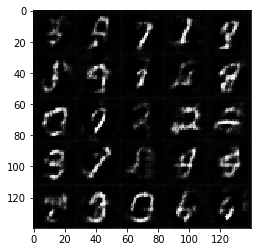

Epoch 1/2... Discriminator Loss: 1.4349... Generator Loss: 0.4683
Epoch 1/2... Discriminator Loss: 1.4384... Generator Loss: 0.4618
Epoch 1/2... Discriminator Loss: 1.7167... Generator Loss: 0.3214
Epoch 1/2... Discriminator Loss: 1.4086... Generator Loss: 0.5005
Epoch 1/2... Discriminator Loss: 1.5585... Generator Loss: 0.3851
Epoch 1/2... Discriminator Loss: 1.5255... Generator Loss: 0.4163
Epoch 1/2... Discriminator Loss: 1.5318... Generator Loss: 2.0282
Epoch 1/2... Discriminator Loss: 1.1534... Generator Loss: 1.0841
Epoch 1/2... Discriminator Loss: 1.0632... Generator Loss: 1.5592
Epoch 1/2... Discriminator Loss: 1.5582... Generator Loss: 1.7466


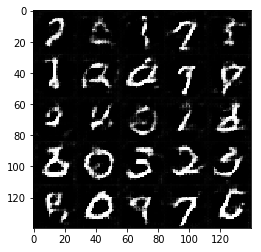

Epoch 1/2... Discriminator Loss: 1.0704... Generator Loss: 1.4533
Epoch 1/2... Discriminator Loss: 1.2238... Generator Loss: 2.1997
Epoch 1/2... Discriminator Loss: 1.1750... Generator Loss: 1.9294
Epoch 1/2... Discriminator Loss: 1.0059... Generator Loss: 1.1424
Epoch 1/2... Discriminator Loss: 1.4383... Generator Loss: 0.4577
Epoch 1/2... Discriminator Loss: 1.9863... Generator Loss: 0.2379
Epoch 1/2... Discriminator Loss: 1.0552... Generator Loss: 0.9121
Epoch 1/2... Discriminator Loss: 1.4711... Generator Loss: 0.4567
Epoch 1/2... Discriminator Loss: 2.0458... Generator Loss: 2.1868
Epoch 1/2... Discriminator Loss: 1.1942... Generator Loss: 1.1429


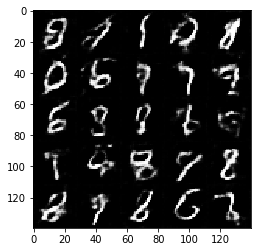

Epoch 1/2... Discriminator Loss: 1.2480... Generator Loss: 1.0063
Epoch 1/2... Discriminator Loss: 1.2455... Generator Loss: 1.3686
Epoch 1/2... Discriminator Loss: 1.3746... Generator Loss: 1.3381
Epoch 1/2... Discriminator Loss: 1.1774... Generator Loss: 1.1806
Epoch 1/2... Discriminator Loss: 1.0298... Generator Loss: 1.7191
Epoch 1/2... Discriminator Loss: 1.1140... Generator Loss: 0.9635
Epoch 2/2... Discriminator Loss: 1.5965... Generator Loss: 0.3550
Epoch 2/2... Discriminator Loss: 1.2533... Generator Loss: 0.6114
Epoch 2/2... Discriminator Loss: 1.4396... Generator Loss: 0.4896
Epoch 2/2... Discriminator Loss: 1.3621... Generator Loss: 0.5298


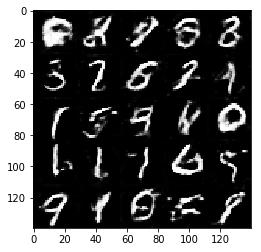

Epoch 2/2... Discriminator Loss: 1.5040... Generator Loss: 0.4336
Epoch 2/2... Discriminator Loss: 1.4611... Generator Loss: 0.4565
Epoch 2/2... Discriminator Loss: 1.6104... Generator Loss: 0.3726
Epoch 2/2... Discriminator Loss: 1.2313... Generator Loss: 0.7613
Epoch 2/2... Discriminator Loss: 1.2708... Generator Loss: 1.1103
Epoch 2/2... Discriminator Loss: 1.2103... Generator Loss: 1.7470
Epoch 2/2... Discriminator Loss: 1.2434... Generator Loss: 0.7769
Epoch 2/2... Discriminator Loss: 1.2511... Generator Loss: 1.2962
Epoch 2/2... Discriminator Loss: 1.5342... Generator Loss: 2.0717
Epoch 2/2... Discriminator Loss: 1.2103... Generator Loss: 1.1906


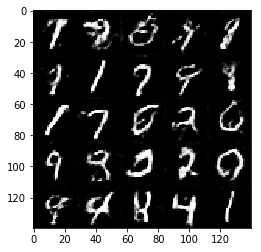

In [ ]:
batch_size = 128
z_dim = 128
learning_rate = .001
beta1 = .2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.6790... Generator Loss: 3.3931
Epoch 1/1... Discriminator Loss: 3.0150... Generator Loss: 0.1887
Epoch 1/1... Discriminator Loss: 1.9483... Generator Loss: 3.6159
Epoch 1/1... Discriminator Loss: 1.4552... Generator Loss: 2.1519
Epoch 1/1... Discriminator Loss: 1.3812... Generator Loss: 2.1067
Epoch 1/1... Discriminator Loss: 1.5681... Generator Loss: 0.5204
Epoch 1/1... Discriminator Loss: 0.9082... Generator Loss: 2.6340
Epoch 1/1... Discriminator Loss: 0.9742... Generator Loss: 1.1793
Epoch 1/1... Discriminator Loss: 1.0365... Generator Loss: 1.2600
Epoch 1/1... Discriminator Loss: 1.7485... Generator Loss: 0.4057


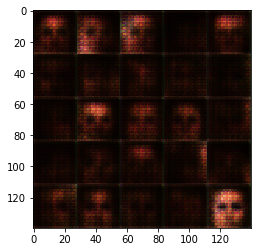

Epoch 1/1... Discriminator Loss: 3.7992... Generator Loss: 4.5409
Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.7003
Epoch 1/1... Discriminator Loss: 0.9238... Generator Loss: 1.3113
Epoch 1/1... Discriminator Loss: 1.4774... Generator Loss: 1.5323
Epoch 1/1... Discriminator Loss: 1.3588... Generator Loss: 2.8254
Epoch 1/1... Discriminator Loss: 0.9894... Generator Loss: 0.9861
Epoch 1/1... Discriminator Loss: 1.4211... Generator Loss: 1.0611
Epoch 1/1... Discriminator Loss: 1.1559... Generator Loss: 1.0211
Epoch 1/1... Discriminator Loss: 1.1611... Generator Loss: 0.9756
Epoch 1/1... Discriminator Loss: 1.0908... Generator Loss: 1.3765


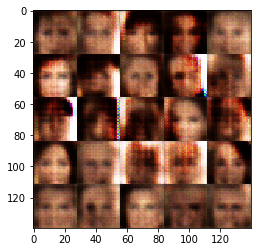

Epoch 1/1... Discriminator Loss: 1.4093... Generator Loss: 0.8971
Epoch 1/1... Discriminator Loss: 2.0512... Generator Loss: 0.2798
Epoch 1/1... Discriminator Loss: 1.3115... Generator Loss: 0.9382
Epoch 1/1... Discriminator Loss: 1.1701... Generator Loss: 0.9106
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.7368
Epoch 1/1... Discriminator Loss: 1.5177... Generator Loss: 0.6678
Epoch 1/1... Discriminator Loss: 1.3338... Generator Loss: 0.6944
Epoch 1/1... Discriminator Loss: 1.3101... Generator Loss: 1.0853
Epoch 1/1... Discriminator Loss: 1.3313... Generator Loss: 0.6949
Epoch 1/1... Discriminator Loss: 1.7598... Generator Loss: 1.8765


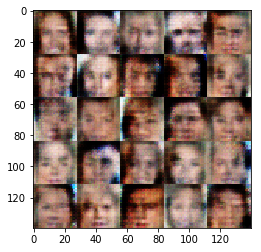

Epoch 1/1... Discriminator Loss: 1.4816... Generator Loss: 0.5978
Epoch 1/1... Discriminator Loss: 1.3603... Generator Loss: 0.8526
Epoch 1/1... Discriminator Loss: 1.1939... Generator Loss: 2.0001
Epoch 1/1... Discriminator Loss: 1.3881... Generator Loss: 1.3441
Epoch 1/1... Discriminator Loss: 1.3246... Generator Loss: 0.7897
Epoch 1/1... Discriminator Loss: 1.2217... Generator Loss: 1.4165
Epoch 1/1... Discriminator Loss: 1.6109... Generator Loss: 0.4257
Epoch 1/1... Discriminator Loss: 1.4128... Generator Loss: 0.7141
Epoch 1/1... Discriminator Loss: 1.4547... Generator Loss: 0.5119
Epoch 1/1... Discriminator Loss: 1.3216... Generator Loss: 0.8435


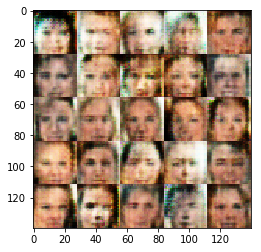

Epoch 1/1... Discriminator Loss: 1.3737... Generator Loss: 0.6324
Epoch 1/1... Discriminator Loss: 1.4666... Generator Loss: 0.6849
Epoch 1/1... Discriminator Loss: 1.3031... Generator Loss: 0.7785
Epoch 1/1... Discriminator Loss: 1.5592... Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.3848... Generator Loss: 0.8443
Epoch 1/1... Discriminator Loss: 1.3168... Generator Loss: 0.7501
Epoch 1/1... Discriminator Loss: 1.3608... Generator Loss: 0.7384
Epoch 1/1... Discriminator Loss: 1.3247... Generator Loss: 0.7524
Epoch 1/1... Discriminator Loss: 1.2147... Generator Loss: 1.1452
Epoch 1/1... Discriminator Loss: 1.3478... Generator Loss: 0.8227


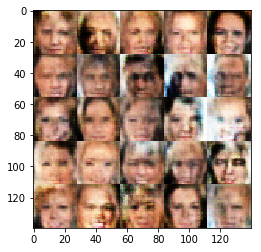

Epoch 1/1... Discriminator Loss: 1.2070... Generator Loss: 0.7140
Epoch 1/1... Discriminator Loss: 1.5504... Generator Loss: 0.9260
Epoch 1/1... Discriminator Loss: 1.4225... Generator Loss: 0.5225
Epoch 1/1... Discriminator Loss: 1.5763... Generator Loss: 1.2119
Epoch 1/1... Discriminator Loss: 1.4020... Generator Loss: 1.3134
Epoch 1/1... Discriminator Loss: 1.2521... Generator Loss: 0.9076
Epoch 1/1... Discriminator Loss: 1.3396... Generator Loss: 0.9184
Epoch 1/1... Discriminator Loss: 1.1246... Generator Loss: 1.4402
Epoch 1/1... Discriminator Loss: 1.4823... Generator Loss: 1.5652
Epoch 1/1... Discriminator Loss: 1.4666... Generator Loss: 1.1295


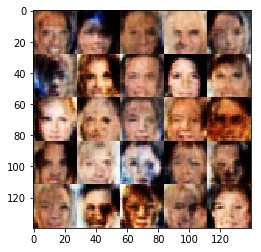

Epoch 1/1... Discriminator Loss: 1.6274... Generator Loss: 0.4748
Epoch 1/1... Discriminator Loss: 1.2973... Generator Loss: 0.8993
Epoch 1/1... Discriminator Loss: 1.0415... Generator Loss: 1.1971
Epoch 1/1... Discriminator Loss: 1.4213... Generator Loss: 0.6145
Epoch 1/1... Discriminator Loss: 1.5457... Generator Loss: 0.5155
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.9201
Epoch 1/1... Discriminator Loss: 1.2326... Generator Loss: 1.0421
Epoch 1/1... Discriminator Loss: 1.4422... Generator Loss: 0.8100
Epoch 1/1... Discriminator Loss: 1.1360... Generator Loss: 1.0611
Epoch 1/1... Discriminator Loss: 1.3538... Generator Loss: 0.7441


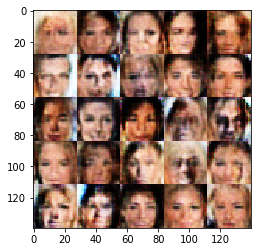

Epoch 1/1... Discriminator Loss: 0.9048... Generator Loss: 1.1777
Epoch 1/1... Discriminator Loss: 1.3543... Generator Loss: 1.0447
Epoch 1/1... Discriminator Loss: 1.3176... Generator Loss: 0.7778
Epoch 1/1... Discriminator Loss: 1.7598... Generator Loss: 0.3586
Epoch 1/1... Discriminator Loss: 1.3420... Generator Loss: 0.9260
Epoch 1/1... Discriminator Loss: 1.4533... Generator Loss: 0.8974
Epoch 1/1... Discriminator Loss: 1.3081... Generator Loss: 0.8537
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.8222
Epoch 1/1... Discriminator Loss: 1.4075... Generator Loss: 1.2616
Epoch 1/1... Discriminator Loss: 1.2847... Generator Loss: 0.9000


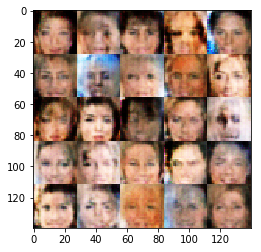

Epoch 1/1... Discriminator Loss: 1.5948... Generator Loss: 0.9226
Epoch 1/1... Discriminator Loss: 1.3297... Generator Loss: 1.1541
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.7085
Epoch 1/1... Discriminator Loss: 1.2003... Generator Loss: 1.8949
Epoch 1/1... Discriminator Loss: 1.3484... Generator Loss: 0.9529
Epoch 1/1... Discriminator Loss: 1.3339... Generator Loss: 0.7851
Epoch 1/1... Discriminator Loss: 1.3322... Generator Loss: 0.9557
Epoch 1/1... Discriminator Loss: 1.3350... Generator Loss: 1.0883
Epoch 1/1... Discriminator Loss: 1.2761... Generator Loss: 0.6955
Epoch 1/1... Discriminator Loss: 1.3310... Generator Loss: 1.0157


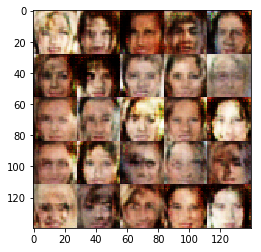

Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 0.7076
Epoch 1/1... Discriminator Loss: 1.3682... Generator Loss: 1.1801
Epoch 1/1... Discriminator Loss: 1.2344... Generator Loss: 0.9190
Epoch 1/1... Discriminator Loss: 1.3720... Generator Loss: 1.0921
Epoch 1/1... Discriminator Loss: 1.3299... Generator Loss: 0.6547
Epoch 1/1... Discriminator Loss: 1.3113... Generator Loss: 1.0027
Epoch 1/1... Discriminator Loss: 1.3521... Generator Loss: 0.9935
Epoch 1/1... Discriminator Loss: 1.2261... Generator Loss: 0.9851
Epoch 1/1... Discriminator Loss: 1.2930... Generator Loss: 0.8402
Epoch 1/1... Discriminator Loss: 1.3350... Generator Loss: 1.0372


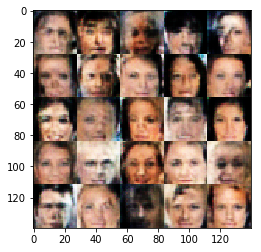

Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 0.9186
Epoch 1/1... Discriminator Loss: 1.3487... Generator Loss: 0.8420
Epoch 1/1... Discriminator Loss: 1.1510... Generator Loss: 0.9769
Epoch 1/1... Discriminator Loss: 1.4219... Generator Loss: 1.4487
Epoch 1/1... Discriminator Loss: 1.2171... Generator Loss: 0.9123
Epoch 1/1... Discriminator Loss: 1.3641... Generator Loss: 0.8793
Epoch 1/1... Discriminator Loss: 1.3613... Generator Loss: 0.6776
Epoch 1/1... Discriminator Loss: 1.2761... Generator Loss: 0.7694
Epoch 1/1... Discriminator Loss: 1.3676... Generator Loss: 0.6819
Epoch 1/1... Discriminator Loss: 1.2874... Generator Loss: 0.8113


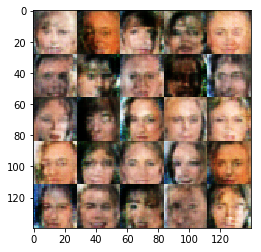

Epoch 1/1... Discriminator Loss: 1.3666... Generator Loss: 0.6766
Epoch 1/1... Discriminator Loss: 1.2988... Generator Loss: 1.0037
Epoch 1/1... Discriminator Loss: 1.3574... Generator Loss: 0.8063
Epoch 1/1... Discriminator Loss: 1.3554... Generator Loss: 0.7676
Epoch 1/1... Discriminator Loss: 1.3556... Generator Loss: 0.8703
Epoch 1/1... Discriminator Loss: 1.3079... Generator Loss: 0.8484
Epoch 1/1... Discriminator Loss: 1.5546... Generator Loss: 1.3737
Epoch 1/1... Discriminator Loss: 1.3669... Generator Loss: 0.8786
Epoch 1/1... Discriminator Loss: 1.2461... Generator Loss: 0.9165
Epoch 1/1... Discriminator Loss: 1.2925... Generator Loss: 0.8158


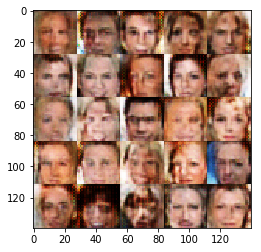

Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 0.7959
Epoch 1/1... Discriminator Loss: 1.3617... Generator Loss: 0.9303
Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 0.9462
Epoch 1/1... Discriminator Loss: 1.4497... Generator Loss: 0.9102
Epoch 1/1... Discriminator Loss: 1.1680... Generator Loss: 0.8850
Epoch 1/1... Discriminator Loss: 1.4558... Generator Loss: 1.0719
Epoch 1/1... Discriminator Loss: 1.4090... Generator Loss: 0.8587
Epoch 1/1... Discriminator Loss: 1.3883... Generator Loss: 0.9095
Epoch 1/1... Discriminator Loss: 1.2228... Generator Loss: 0.9629
Epoch 1/1... Discriminator Loss: 1.2618... Generator Loss: 0.7425


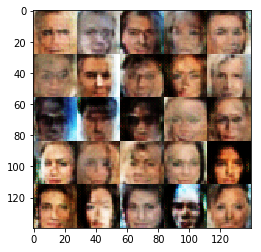

Epoch 1/1... Discriminator Loss: 1.3041... Generator Loss: 0.9723
Epoch 1/1... Discriminator Loss: 1.3210... Generator Loss: 0.9656
Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 0.9192
Epoch 1/1... Discriminator Loss: 1.3431... Generator Loss: 0.7892
Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.7930
Epoch 1/1... Discriminator Loss: 1.2847... Generator Loss: 1.0324
Epoch 1/1... Discriminator Loss: 1.3144... Generator Loss: 0.9081
Epoch 1/1... Discriminator Loss: 1.3154... Generator Loss: 0.9237
Epoch 1/1... Discriminator Loss: 1.3032... Generator Loss: 0.8797
Epoch 1/1... Discriminator Loss: 1.3078... Generator Loss: 0.9870


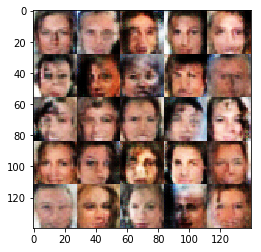

Epoch 1/1... Discriminator Loss: 1.3739... Generator Loss: 1.1933
Epoch 1/1... Discriminator Loss: 1.3779... Generator Loss: 1.2402
Epoch 1/1... Discriminator Loss: 1.2800... Generator Loss: 1.1929
Epoch 1/1... Discriminator Loss: 1.5875... Generator Loss: 0.5484
Epoch 1/1... Discriminator Loss: 1.3203... Generator Loss: 0.8207
Epoch 1/1... Discriminator Loss: 1.2950... Generator Loss: 1.0038
Epoch 1/1... Discriminator Loss: 1.2883... Generator Loss: 0.8547
Epoch 1/1... Discriminator Loss: 1.2904... Generator Loss: 1.0308
Epoch 1/1... Discriminator Loss: 1.5361... Generator Loss: 0.4763
Epoch 1/1... Discriminator Loss: 1.3668... Generator Loss: 0.8801


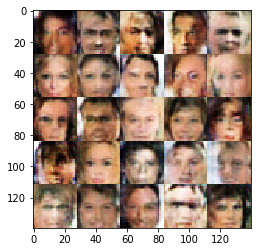

Epoch 1/1... Discriminator Loss: 1.4134... Generator Loss: 1.0450
Epoch 1/1... Discriminator Loss: 1.2764... Generator Loss: 1.0390
Epoch 1/1... Discriminator Loss: 1.2735... Generator Loss: 0.9253
Epoch 1/1... Discriminator Loss: 1.3357... Generator Loss: 0.9086
Epoch 1/1... Discriminator Loss: 1.3246... Generator Loss: 0.8967
Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 0.9602
Epoch 1/1... Discriminator Loss: 1.3847... Generator Loss: 0.8749
Epoch 1/1... Discriminator Loss: 1.2433... Generator Loss: 0.8941
Epoch 1/1... Discriminator Loss: 1.1879... Generator Loss: 1.2058
Epoch 1/1... Discriminator Loss: 1.2168... Generator Loss: 0.8875


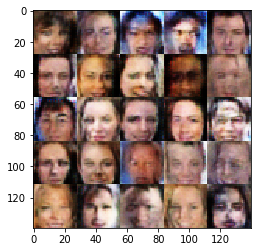

Epoch 1/1... Discriminator Loss: 1.3140... Generator Loss: 0.8200
Epoch 1/1... Discriminator Loss: 1.2271... Generator Loss: 1.0633
Epoch 1/1... Discriminator Loss: 1.2956... Generator Loss: 1.4559
Epoch 1/1... Discriminator Loss: 1.3035... Generator Loss: 0.9790
Epoch 1/1... Discriminator Loss: 1.3263... Generator Loss: 0.9418
Epoch 1/1... Discriminator Loss: 1.3070... Generator Loss: 0.8245
Epoch 1/1... Discriminator Loss: 1.4507... Generator Loss: 1.3649
Epoch 1/1... Discriminator Loss: 1.3255... Generator Loss: 1.0440
Epoch 1/1... Discriminator Loss: 1.2507... Generator Loss: 1.2034
Epoch 1/1... Discriminator Loss: 1.3240... Generator Loss: 0.8009


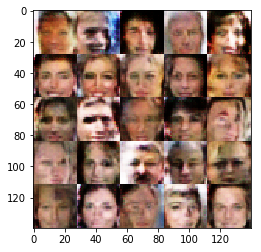

Epoch 1/1... Discriminator Loss: 1.1875... Generator Loss: 0.9858
Epoch 1/1... Discriminator Loss: 1.4071... Generator Loss: 1.0165
Epoch 1/1... Discriminator Loss: 1.3628... Generator Loss: 0.9163
Epoch 1/1... Discriminator Loss: 1.2638... Generator Loss: 1.0928
Epoch 1/1... Discriminator Loss: 1.2874... Generator Loss: 0.7952
Epoch 1/1... Discriminator Loss: 1.2944... Generator Loss: 0.7373
Epoch 1/1... Discriminator Loss: 1.3445... Generator Loss: 0.8138
Epoch 1/1... Discriminator Loss: 1.3534... Generator Loss: 0.9099
Epoch 1/1... Discriminator Loss: 1.3342... Generator Loss: 0.9841
Epoch 1/1... Discriminator Loss: 1.3166... Generator Loss: 0.8782


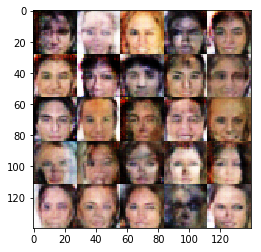

Epoch 1/1... Discriminator Loss: 1.3828... Generator Loss: 1.3743
Epoch 1/1... Discriminator Loss: 1.3654... Generator Loss: 0.8738
Epoch 1/1... Discriminator Loss: 1.2498... Generator Loss: 0.9570
Epoch 1/1... Discriminator Loss: 1.2495... Generator Loss: 1.1486
Epoch 1/1... Discriminator Loss: 1.4273... Generator Loss: 0.9716
Epoch 1/1... Discriminator Loss: 1.2484... Generator Loss: 0.7869
Epoch 1/1... Discriminator Loss: 1.4070... Generator Loss: 1.3307
Epoch 1/1... Discriminator Loss: 1.2799... Generator Loss: 0.8579
Epoch 1/1... Discriminator Loss: 1.5560... Generator Loss: 0.9134
Epoch 1/1... Discriminator Loss: 1.3939... Generator Loss: 0.7443


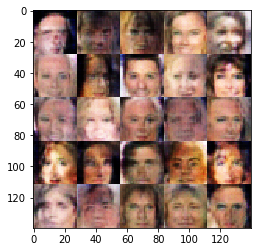

Epoch 1/1... Discriminator Loss: 1.3478... Generator Loss: 0.8251
Epoch 1/1... Discriminator Loss: 1.3623... Generator Loss: 1.0787
Epoch 1/1... Discriminator Loss: 1.3140... Generator Loss: 0.7523
Epoch 1/1... Discriminator Loss: 1.3329... Generator Loss: 0.9360
Epoch 1/1... Discriminator Loss: 1.3461... Generator Loss: 0.8820
Epoch 1/1... Discriminator Loss: 1.3454... Generator Loss: 0.9989
Epoch 1/1... Discriminator Loss: 1.3299... Generator Loss: 0.9213
Epoch 1/1... Discriminator Loss: 1.2724... Generator Loss: 1.0215
Epoch 1/1... Discriminator Loss: 1.3125... Generator Loss: 0.8511
Epoch 1/1... Discriminator Loss: 1.3520... Generator Loss: 0.6754


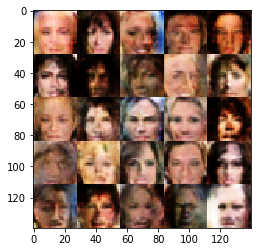

Epoch 1/1... Discriminator Loss: 1.3032... Generator Loss: 0.8869
Epoch 1/1... Discriminator Loss: 1.3330... Generator Loss: 0.9804
Epoch 1/1... Discriminator Loss: 1.3466... Generator Loss: 1.0086
Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 1.0389
Epoch 1/1... Discriminator Loss: 1.2999... Generator Loss: 0.9882
Epoch 1/1... Discriminator Loss: 2.9390... Generator Loss: 3.8111
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.8664
Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.8784
Epoch 1/1... Discriminator Loss: 1.3531... Generator Loss: 0.9313
Epoch 1/1... Discriminator Loss: 1.3229... Generator Loss: 1.0258


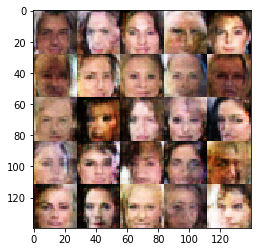

Epoch 1/1... Discriminator Loss: 1.3317... Generator Loss: 0.8038
Epoch 1/1... Discriminator Loss: 1.3241... Generator Loss: 0.9742
Epoch 1/1... Discriminator Loss: 1.3143... Generator Loss: 0.9090
Epoch 1/1... Discriminator Loss: 1.3078... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.3554... Generator Loss: 0.8348
Epoch 1/1... Discriminator Loss: 1.2107... Generator Loss: 0.8565
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 1.0094
Epoch 1/1... Discriminator Loss: 1.2966... Generator Loss: 0.8167
Epoch 1/1... Discriminator Loss: 1.3077... Generator Loss: 1.1196
Epoch 1/1... Discriminator Loss: 1.2571... Generator Loss: 0.9441


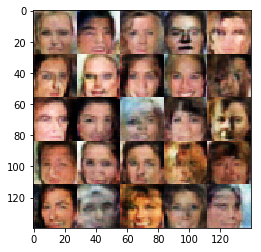

Epoch 1/1... Discriminator Loss: 1.2684... Generator Loss: 0.7941
Epoch 1/1... Discriminator Loss: 1.3316... Generator Loss: 0.8600
Epoch 1/1... Discriminator Loss: 1.3705... Generator Loss: 0.8569
Epoch 1/1... Discriminator Loss: 1.2293... Generator Loss: 0.8708
Epoch 1/1... Discriminator Loss: 1.2821... Generator Loss: 0.8126
Epoch 1/1... Discriminator Loss: 1.2602... Generator Loss: 0.9973
Epoch 1/1... Discriminator Loss: 1.7518... Generator Loss: 0.3659
Epoch 1/1... Discriminator Loss: 1.2708... Generator Loss: 0.9834
Epoch 1/1... Discriminator Loss: 1.4041... Generator Loss: 0.8433
Epoch 1/1... Discriminator Loss: 1.1827... Generator Loss: 0.8361


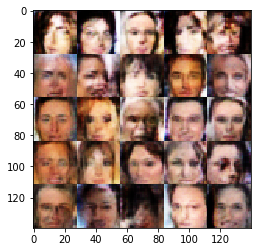

Epoch 1/1... Discriminator Loss: 1.3184... Generator Loss: 0.8136
Epoch 1/1... Discriminator Loss: 1.3225... Generator Loss: 0.9490
Epoch 1/1... Discriminator Loss: 1.2562... Generator Loss: 0.7712
Epoch 1/1... Discriminator Loss: 1.2873... Generator Loss: 0.9843
Epoch 1/1... Discriminator Loss: 1.3562... Generator Loss: 0.6690
Epoch 1/1... Discriminator Loss: 1.3695... Generator Loss: 0.9777
Epoch 1/1... Discriminator Loss: 1.2118... Generator Loss: 0.9812
Epoch 1/1... Discriminator Loss: 1.2674... Generator Loss: 0.8069
Epoch 1/1... Discriminator Loss: 1.3772... Generator Loss: 0.6953
Epoch 1/1... Discriminator Loss: 1.2325... Generator Loss: 1.2009


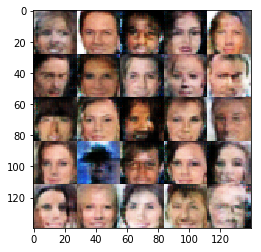

Epoch 1/1... Discriminator Loss: 1.3341... Generator Loss: 0.9461
Epoch 1/1... Discriminator Loss: 1.4543... Generator Loss: 0.5995
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 1.2464
Epoch 1/1... Discriminator Loss: 1.4242... Generator Loss: 0.5844
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.6997
Epoch 1/1... Discriminator Loss: 1.2847... Generator Loss: 1.0868
Epoch 1/1... Discriminator Loss: 1.2353... Generator Loss: 0.9661
Epoch 1/1... Discriminator Loss: 1.2986... Generator Loss: 0.9878
Epoch 1/1... Discriminator Loss: 1.3622... Generator Loss: 0.6537
Epoch 1/1... Discriminator Loss: 1.3268... Generator Loss: 1.1778


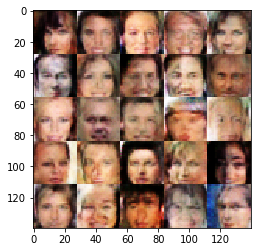

Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 0.7324
Epoch 1/1... Discriminator Loss: 1.3483... Generator Loss: 0.8821
Epoch 1/1... Discriminator Loss: 1.3679... Generator Loss: 0.7781
Epoch 1/1... Discriminator Loss: 1.2843... Generator Loss: 0.9092
Epoch 1/1... Discriminator Loss: 1.2403... Generator Loss: 0.7566
Epoch 1/1... Discriminator Loss: 1.3876... Generator Loss: 0.8378
Epoch 1/1... Discriminator Loss: 1.3158... Generator Loss: 0.7964
Epoch 1/1... Discriminator Loss: 1.3269... Generator Loss: 0.9145
Epoch 1/1... Discriminator Loss: 1.6765... Generator Loss: 0.5581
Epoch 1/1... Discriminator Loss: 1.3137... Generator Loss: 0.9716


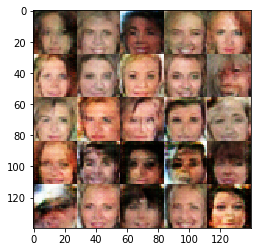

Epoch 1/1... Discriminator Loss: 1.2886... Generator Loss: 0.8316
Epoch 1/1... Discriminator Loss: 1.2683... Generator Loss: 0.8267
Epoch 1/1... Discriminator Loss: 0.8888... Generator Loss: 1.2042
Epoch 1/1... Discriminator Loss: 1.7968... Generator Loss: 1.3598
Epoch 1/1... Discriminator Loss: 1.3052... Generator Loss: 0.9880
Epoch 1/1... Discriminator Loss: 1.4423... Generator Loss: 1.2925
Epoch 1/1... Discriminator Loss: 1.3669... Generator Loss: 0.8949
Epoch 1/1... Discriminator Loss: 1.4265... Generator Loss: 0.6689
Epoch 1/1... Discriminator Loss: 1.3114... Generator Loss: 0.8404
Epoch 1/1... Discriminator Loss: 1.2808... Generator Loss: 0.8785


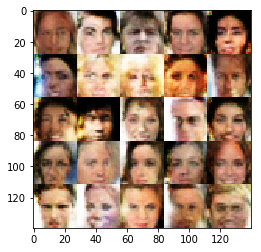

Epoch 1/1... Discriminator Loss: 1.2477... Generator Loss: 0.7939
Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.8125
Epoch 1/1... Discriminator Loss: 1.3326... Generator Loss: 1.0371
Epoch 1/1... Discriminator Loss: 1.3377... Generator Loss: 0.9701
Epoch 1/1... Discriminator Loss: 1.3547... Generator Loss: 0.7355
Epoch 1/1... Discriminator Loss: 1.2323... Generator Loss: 0.8533
Epoch 1/1... Discriminator Loss: 1.4363... Generator Loss: 0.6950
Epoch 1/1... Discriminator Loss: 1.1409... Generator Loss: 0.8878
Epoch 1/1... Discriminator Loss: 1.2932... Generator Loss: 1.2321
Epoch 1/1... Discriminator Loss: 1.3629... Generator Loss: 1.1325


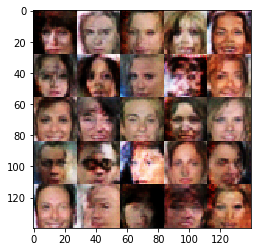

Epoch 1/1... Discriminator Loss: 1.2098... Generator Loss: 0.8605
Epoch 1/1... Discriminator Loss: 1.3611... Generator Loss: 0.7467
Epoch 1/1... Discriminator Loss: 1.2763... Generator Loss: 0.7675
Epoch 1/1... Discriminator Loss: 1.2496... Generator Loss: 0.9958
Epoch 1/1... Discriminator Loss: 1.1583... Generator Loss: 0.9289
Epoch 1/1... Discriminator Loss: 1.4270... Generator Loss: 0.6902
Epoch 1/1... Discriminator Loss: 1.3605... Generator Loss: 0.7276
Epoch 1/1... Discriminator Loss: 1.3429... Generator Loss: 0.9851
Epoch 1/1... Discriminator Loss: 1.3000... Generator Loss: 0.9105
Epoch 1/1... Discriminator Loss: 1.2824... Generator Loss: 0.8913


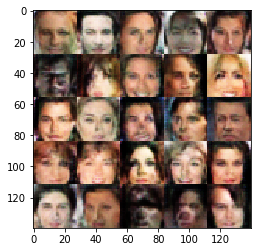

Epoch 1/1... Discriminator Loss: 1.4895... Generator Loss: 0.5921
Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.8398
Epoch 1/1... Discriminator Loss: 1.2437... Generator Loss: 0.9322
Epoch 1/1... Discriminator Loss: 1.3195... Generator Loss: 0.9657
Epoch 1/1... Discriminator Loss: 1.2396... Generator Loss: 0.9045
Epoch 1/1... Discriminator Loss: 1.3330... Generator Loss: 0.9029
Epoch 1/1... Discriminator Loss: 1.2912... Generator Loss: 0.8138
Epoch 1/1... Discriminator Loss: 1.4076... Generator Loss: 1.4507
Epoch 1/1... Discriminator Loss: 1.3009... Generator Loss: 0.8571
Epoch 1/1... Discriminator Loss: 1.3301... Generator Loss: 0.8953


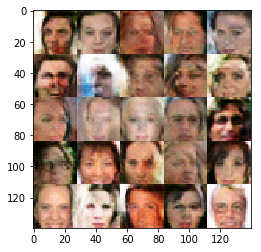

Epoch 1/1... Discriminator Loss: 1.2340... Generator Loss: 0.9356
Epoch 1/1... Discriminator Loss: 1.2378... Generator Loss: 0.7305
Epoch 1/1... Discriminator Loss: 1.6489... Generator Loss: 0.5335
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.9664
Epoch 1/1... Discriminator Loss: 1.2830... Generator Loss: 0.9882
Epoch 1/1... Discriminator Loss: 1.2723... Generator Loss: 0.9859
Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 0.8899
Epoch 1/1... Discriminator Loss: 1.3029... Generator Loss: 0.9166
Epoch 1/1... Discriminator Loss: 1.4548... Generator Loss: 0.9056
Epoch 1/1... Discriminator Loss: 1.4343... Generator Loss: 0.6870


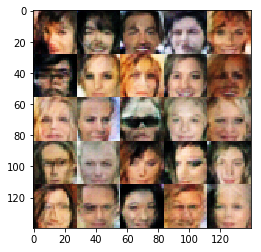

Epoch 1/1... Discriminator Loss: 1.1440... Generator Loss: 1.0120
Epoch 1/1... Discriminator Loss: 1.2023... Generator Loss: 0.7416
Epoch 1/1... Discriminator Loss: 1.3655... Generator Loss: 1.0453
Epoch 1/1... Discriminator Loss: 1.4199... Generator Loss: 0.9547
Epoch 1/1... Discriminator Loss: 1.2750... Generator Loss: 1.2503
Epoch 1/1... Discriminator Loss: 1.1665... Generator Loss: 0.7980


In [16]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.